# Comparing Models

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
# models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
dataset = pd.read_csv('diabetes.csv')
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

In [8]:
# scale features

In [9]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

In [10]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Tree',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(kernel='rbf',gamma=1)))

### fit and compare

In [11]:
names = []
results = []
means = []
sdevs = []
scoring = 'accuracy'

In [13]:
for name,model in models:
    kfold = KFold(n_splits=10,random_state=1)
    cv_results = cross_val_score(model,X2,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    means.append(cv_results.mean())
    sdevs.append(cv_results.std())
    names.append(name)

In [14]:
# random_state ensures that same splits on all models

In [15]:
df1 = pd.DataFrame()
df1['name'] = names
df1['mean accuracy'] = means
df1['accuracy std dev'] = sdevs
df1

,name,mean accuracy,accuracy std dev
0,LR,0.761740,0.052185
1,LDA,0.773462,0.051592
2,KNN,0.744754,0.060567
3,Tree,0.701743,0.056017
4,NB,0.755178,0.042766
5,SVM,0.777290,0.057350


In [16]:
# boxplot for comparison

Text(0, 0.5, 'Test Accuracy Rate')

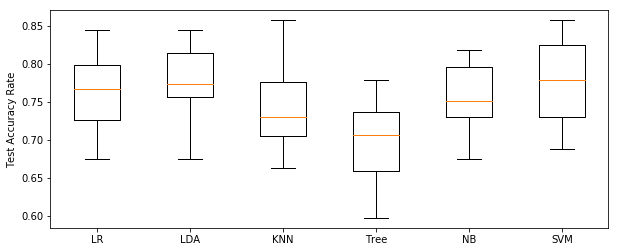

In [17]:
plt.figure(figsize=(10,4))
plt.boxplot(results)
plt.xticks(range(1,7),names)
plt.ylabel('Test Accuracy Rate')